In [1]:
import numpy as np
from sklearn import linear_model


X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)


predicted = logr.predict(np.array([0.001*i for i in range(4000)]).reshape(-1,1))
print(predicted) 

[0 0 0 ... 1 1 1]


In [2]:
logr.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [3]:
logr.score(X,y)

0.9166666666666666

In [4]:
logapuesta=logr.coef_
print(logapuesta)

[[1.39510954]]


In [5]:
o=0
while(not predicted[o]):
    o+=1

print(o)

3467


In [6]:
predicted[3460:3470]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

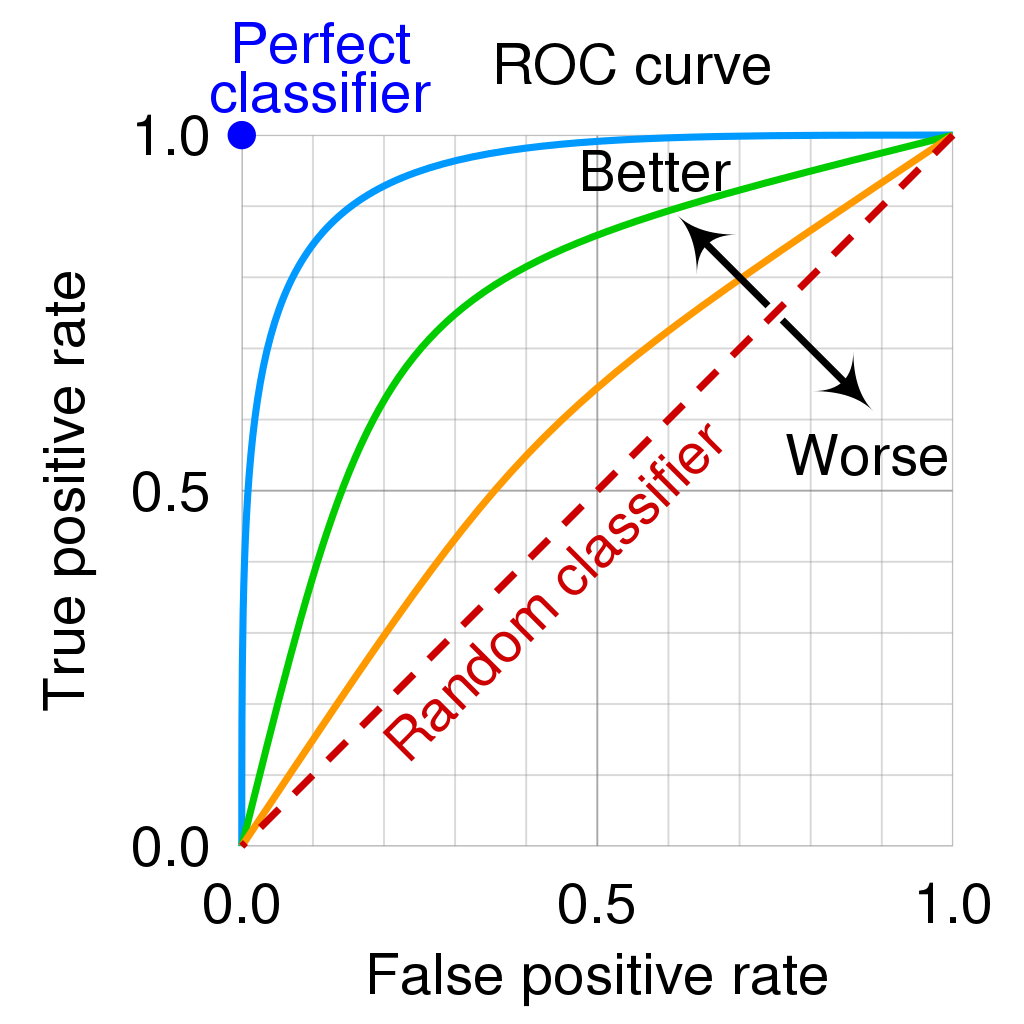

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [8]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X, y)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X, y)
y_pred = lrt.predict(X, threshold)

lrt.predict(np.array([0.001*i for i in range(5000)]).reshape(-1,1),threshold)

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
predicted = lrt.predict(np.array([0.001*i for i in range(5000)]).reshape(-1,1), threshold)

In [10]:
predicted[:40000]

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
o=0
while(not predicted[o]):
    o+=1

print(o)

4370
